In [33]:
# Dependencies and Setup
import hvplot.pandas
import holoviews


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import geoapify_key


In [34]:
hap_df = pd.read_csv('./Resources/2022.csv')
print(hap_df.columns)
hap_df = hap_df[['Country', 'Happiness score']]
hap_df.columns = ['Country', 'Happiness Score']
cost_df = pd.read_csv('./Resources/Cost_of_Living_Index_2022.csv')
print(cost_df.columns)
cost_df = cost_df[['Country', 'Local Purchasing Power Index', 'Cost of Living Index']]

print(hap_df.head())
print(cost_df.head())

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')
Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')
       Country Happiness Score
0      Finland           7,821
1      Denmark           7,636
2      Iceland           7,557
3  Switzerland           7,512
4  Netherlands           7,415
       Country  Local Purchasing Power Index  Cost of Living Index
0  Afghanistan                         23.04                 20.37
1      Albania                         30.19                 35.50
2      Algeria        

In [35]:
# Merging
mHapCost_df = hap_df.merge(cost_df, how='inner', on='Country')
mHapCost_df.head()

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index
0,Finland,"7,821",91.02,73.20
1,Denmark,"7,636",99.45,84.12
2,Iceland,"7,557",77.06,94.86
3,Switzerland,"7,512",118.44,123.35
4,Netherlands,"7,415",87.99,75.66


In [36]:
mHapCost_df.count()

Country                         106
Happiness Score                 106
Local Purchasing Power Index    106
Cost of Living Index            106
dtype: int64

In [37]:
capCoord_df = pd.read_csv('./Resources/country-capitals.csv', on_bad_lines='skip')
print(capCoord_df.columns)
del capCoord_df['CountryCode']
del capCoord_df['ContinentName']
capCoord_df.columns = ['Country', 'Capital', 'Latitude', 'Longitude']
print(capCoord_df.columns)

capCoord_df

Index(['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude',
       'CountryCode', 'ContinentName'],
      dtype='object')
Index(['Country', 'Capital', 'Latitude', 'Longitude'], dtype='object')


,Country,Capital,Latitude,Longitude
0,Somaliland,Hargeisa,9.550000,44.050000
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667
3,Palestine,Jerusalem,31.766667,35.233333
4,Aland Islands,Mariehamn,60.116667,19.900000
...,...,...,...,...
238,Northern Cyprus,North Nicosia,35.183333,33.366667
239,Hong Kong,NaN,0.000000,0.000000
240,Heard Island and McDonald Islands,NaN,0.000000,0.000000
241,British Indian Ocean Territory,Diego Garcia,-7.300000,72.400000


In [38]:
mHapCost_df = mHapCost_df.merge(capCoord_df, how='inner', on='Country')
mHapCost_df

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
0,Finland,"7,821",91.02,73.20,Helsinki,60.166667,24.933333
1,Denmark,"7,636",99.45,84.12,Copenhagen,55.666667,12.583333
2,Iceland,"7,557",77.06,94.86,Reykjavik,64.150000,-21.950000
3,Switzerland,"7,512",118.44,123.35,Bern,46.916667,7.466667
4,Netherlands,"7,415",87.99,75.66,Amsterdam,52.350000,4.916667
...,...,...,...,...,...,...,...
98,Zambia,"3,760",40.33,33.04,Lusaka,-15.416667,28.283333
99,Tanzania,"3,702",15.97,32.81,Dar es Salaam,-6.800000,39.283333
100,Zimbabwe,"2,995",19.07,45.68,Harare,-17.816667,31.033333
101,Lebanon,"2,955",35.12,69.62,Beirut,33.866667,35.500000


In [39]:
mHapCost_df['Happiness Score'] = mHapCost_df['Happiness Score'].str.replace(",", "").astype('float')
mHapCost_df.dtypes


Country                          object
Happiness Score                 float64
Local Purchasing Power Index    float64
Cost of Living Index            float64
Capital                          object
Latitude                        float64
Longitude                       float64
dtype: object

In [40]:

srt_df= mHapCost_df.sort_values(by='Country')
print(srt_df.head(20))

         Country  Happiness Score  Local Purchasing Power Index  \
102  Afghanistan           2404.0                         23.04   
72       Albania           5199.0                         30.19   
75       Algeria           5122.0                         24.63   
49     Argentina           5967.0                         30.72   
68       Armenia           5399.0                         28.86   
10     Australia           7162.0                        104.63   
9        Austria           7163.0                         77.25   
17       Bahrain           6647.0                         61.41   
74    Bangladesh           5155.0                         25.30   
15       Belgium           6805.0                         79.72   
60       Bolivia           5600.0                         36.04   
32        Brazil           6293.0                         27.85   
70      Bulgaria           5371.0                         45.96   
86      Cambodia           4640.0                         13.3

In [41]:
# %%capture --no-display
print(mHapCost_df.columns)
happiestplot = mHapCost_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.1,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)
happiestplot

Index(['Country', 'Happiness Score', 'Local Purchasing Power Index',
       'Cost of Living Index', 'Capital', 'Latitude', 'Longitude'],
      dtype='object')


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Happiness Score)

In [42]:
top20Hap = mHapCost_df.sort_values('Happiness Score', ascending=False).head(20)
top20Hap

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667
5,Sweden,7384.0,98.14,71.74,Stockholm,59.333333,18.050000
6,Norway,7365.0,83.11,100.90,Oslo,59.916667,10.750000
7,Israel,7364.0,75.58,88.05,Jerusalem,31.766667,35.233333
8,New Zealand,7200.0,83.63,74.52,Wellington,-41.300000,174.783333
9,Austria,7163.0,77.25,71.04,Vienna,48.200000,16.366667


In [43]:
top20HapPlot = top20Hap.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.15,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)
top20HapPlot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Happiness Score)

In [44]:
bottom20Hap = mHapCost_df.sort_values('Happiness Score').head(20)
bottom20Hap

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
102,Afghanistan,2404.0,23.04,20.37,Kabul,34.516667,69.183333
101,Lebanon,2955.0,35.12,69.62,Beirut,33.866667,35.500000
100,Zimbabwe,2995.0,19.07,45.68,Harare,-17.816667,31.033333
99,Tanzania,3702.0,15.97,32.81,Dar es Salaam,-6.800000,39.283333
98,Zambia,3760.0,40.33,33.04,Lusaka,-15.416667,28.283333
97,India,3777.0,49.72,24.43,New Delhi,28.600000,77.200000
96,Jordan,4152.0,31.34,49.19,Amman,31.950000,35.933333
95,Ethiopia,4241.0,10.15,47.49,Addis Ababa,9.033333,38.700000
94,Egypt,4288.0,21.54,29.52,Cairo,30.050000,31.250000
93,Sri Lanka,4362.0,19.27,31.29,Colombo,6.916667,79.833333


In [45]:
bottom20HapPlot = bottom20Hap.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.3,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)
bottom20HapPlot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Happiness Score)

In [46]:
mHapCost_df.count()

Country                         103
Happiness Score                 103
Local Purchasing Power Index    103
Cost of Living Index            103
Capital                         103
Latitude                        103
Longitude                       103
dtype: int64

In [47]:
crime_df = pd.read_csv('./Resources/WorldCrimeIndex.csv', encoding='utf-8')

crime_df.head()

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29


In [48]:
df = crime_df['City'].str.split(", ", expand=True)
# crime_df.rename(columns={'City':"Country"})
df.head()

,0,1,2
0,Caracas,Venezuela,None
1,Pretoria,South Africa,None
2,Celaya,Mexico,None
3,San Pedro Sula,Honduras,None
4,Port Moresby,Papua New Guinea,None


In [50]:
crime_df['Country'] = df[1]
del crime_df['City']
crime_df = crime_df.groupby('Country').mean()
crime_df.head(30)

,Rank,Crime Index,Safety Index
Country,,,
AB,55.000000,63.890000,36.110000
AK,68.000000,62.270000,37.730000
AZ,158.500000,51.260000,48.740000
Afghanistan,8.000000,79.390000,20.610000
Albania,230.000000,44.500000,55.500000
Algeria,130.000000,53.880000,46.120000
Angola,40.000000,67.450000,32.550000
Argentina,51.666667,66.273333,33.726667
Armenia,428.000000,21.660000,78.340000


In [53]:
mHapCosCrim = mHapCost_df.copy().merge(crime_df, how='inner', on='Country')
print(crime_df.dtypes)
print(mHapCost_df.dtypes)
print(mHapCosCrim.count())
mHapCosCrim.head()


Crime Index     float64
Safety Index    float64
dtype: object
Country                          object
Happiness Score                 float64
Local Purchasing Power Index    float64
Cost of Living Index            float64
Capital                          object
Latitude                        float64
Longitude                       float64
dtype: object
Country                         94
Happiness Score                 94
Local Purchasing Power Index    94
Cost of Living Index            94
Capital                         94
Latitude                        94
Longitude                       94
Crime Index                     94
Safety Index                    94
dtype: int64


,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Crime Index,Safety Index
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,27.763333,72.236667
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,24.270000,75.730000
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,23.020000,76.980000
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,21.156667,78.843333
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,27.235000,72.765000


In [54]:
print(mHapCosCrim.count())
no_na_df = mHapCosCrim.dropna()
no_na_df.count()

Country                         94
Happiness Score                 94
Local Purchasing Power Index    94
Cost of Living Index            94
Capital                         94
Latitude                        94
Longitude                       94
Crime Index                     94
Safety Index                    94
dtype: int64


Country                         94
Happiness Score                 94
Local Purchasing Power Index    94
Cost of Living Index            94
Capital                         94
Latitude                        94
Longitude                       94
Crime Index                     94
Safety Index                    94
dtype: int64

Pearon's R Coefficient: 0.6548941905763125


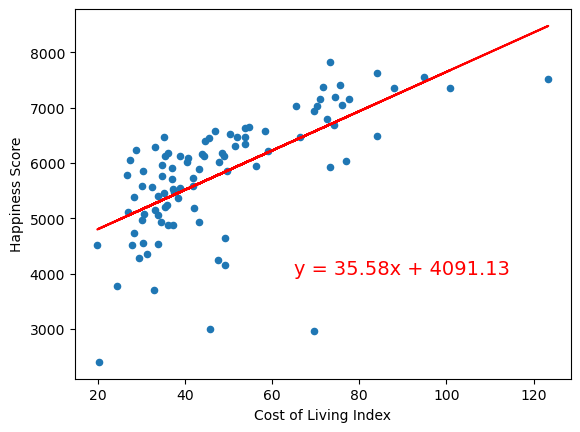

In [55]:
(m, y, r, p, std) = linregress(mHapCosCrim['Cost of Living Index'], mHapCosCrim['Happiness Score'])
yregressLin = m * mHapCosCrim['Cost of Living Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Cost of Living Index', y = 'Happiness Score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearon's R Coefficient: {r}")
plt.plot(mHapCosCrim['Cost of Living Index'], yregressLin, color='red')
plt.annotate(equation, (65, 4000), color='red', size = 14)
plt.show()

Pearon's R Coefficient: -0.4386302852303171


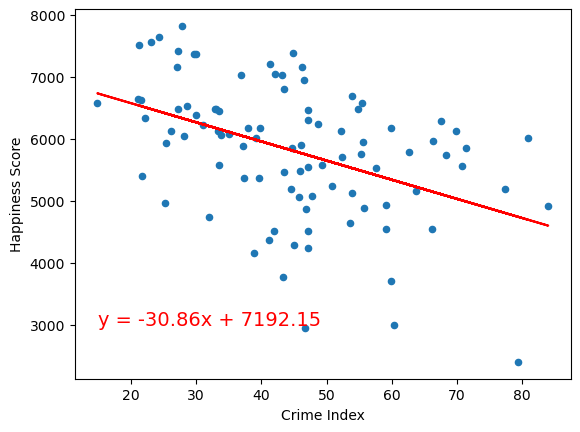

In [56]:
(m, y, r, p, std) = linregress(mHapCosCrim['Crime Index'], mHapCosCrim['Happiness Score'])
yregressLin = m * mHapCosCrim['Crime Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Crime Index', y = 'Happiness Score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearon's R Coefficient: {r}")
plt.plot(mHapCosCrim['Crime Index'], yregressLin, color='red')
plt.annotate(equation, (15, 3000), color='red', size = 14)
plt.show()

Pearon's R Coefficient: 0.7221735991986103


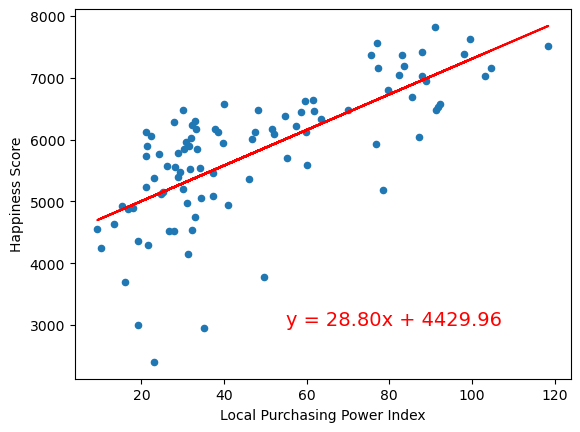

In [57]:
(m, y, r, p, std) = linregress(mHapCosCrim['Local Purchasing Power Index'], mHapCosCrim['Happiness Score'])
yregressLin = m * mHapCosCrim['Local Purchasing Power Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Local Purchasing Power Index', y = 'Happiness Score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearon's R Coefficient: {r}")
plt.plot(mHapCosCrim['Local Purchasing Power Index'], yregressLin, color='red')
plt.annotate(equation, (55, 3000), color='red', size = 14)
plt.show()

<IPython.core.display.Javascript object>


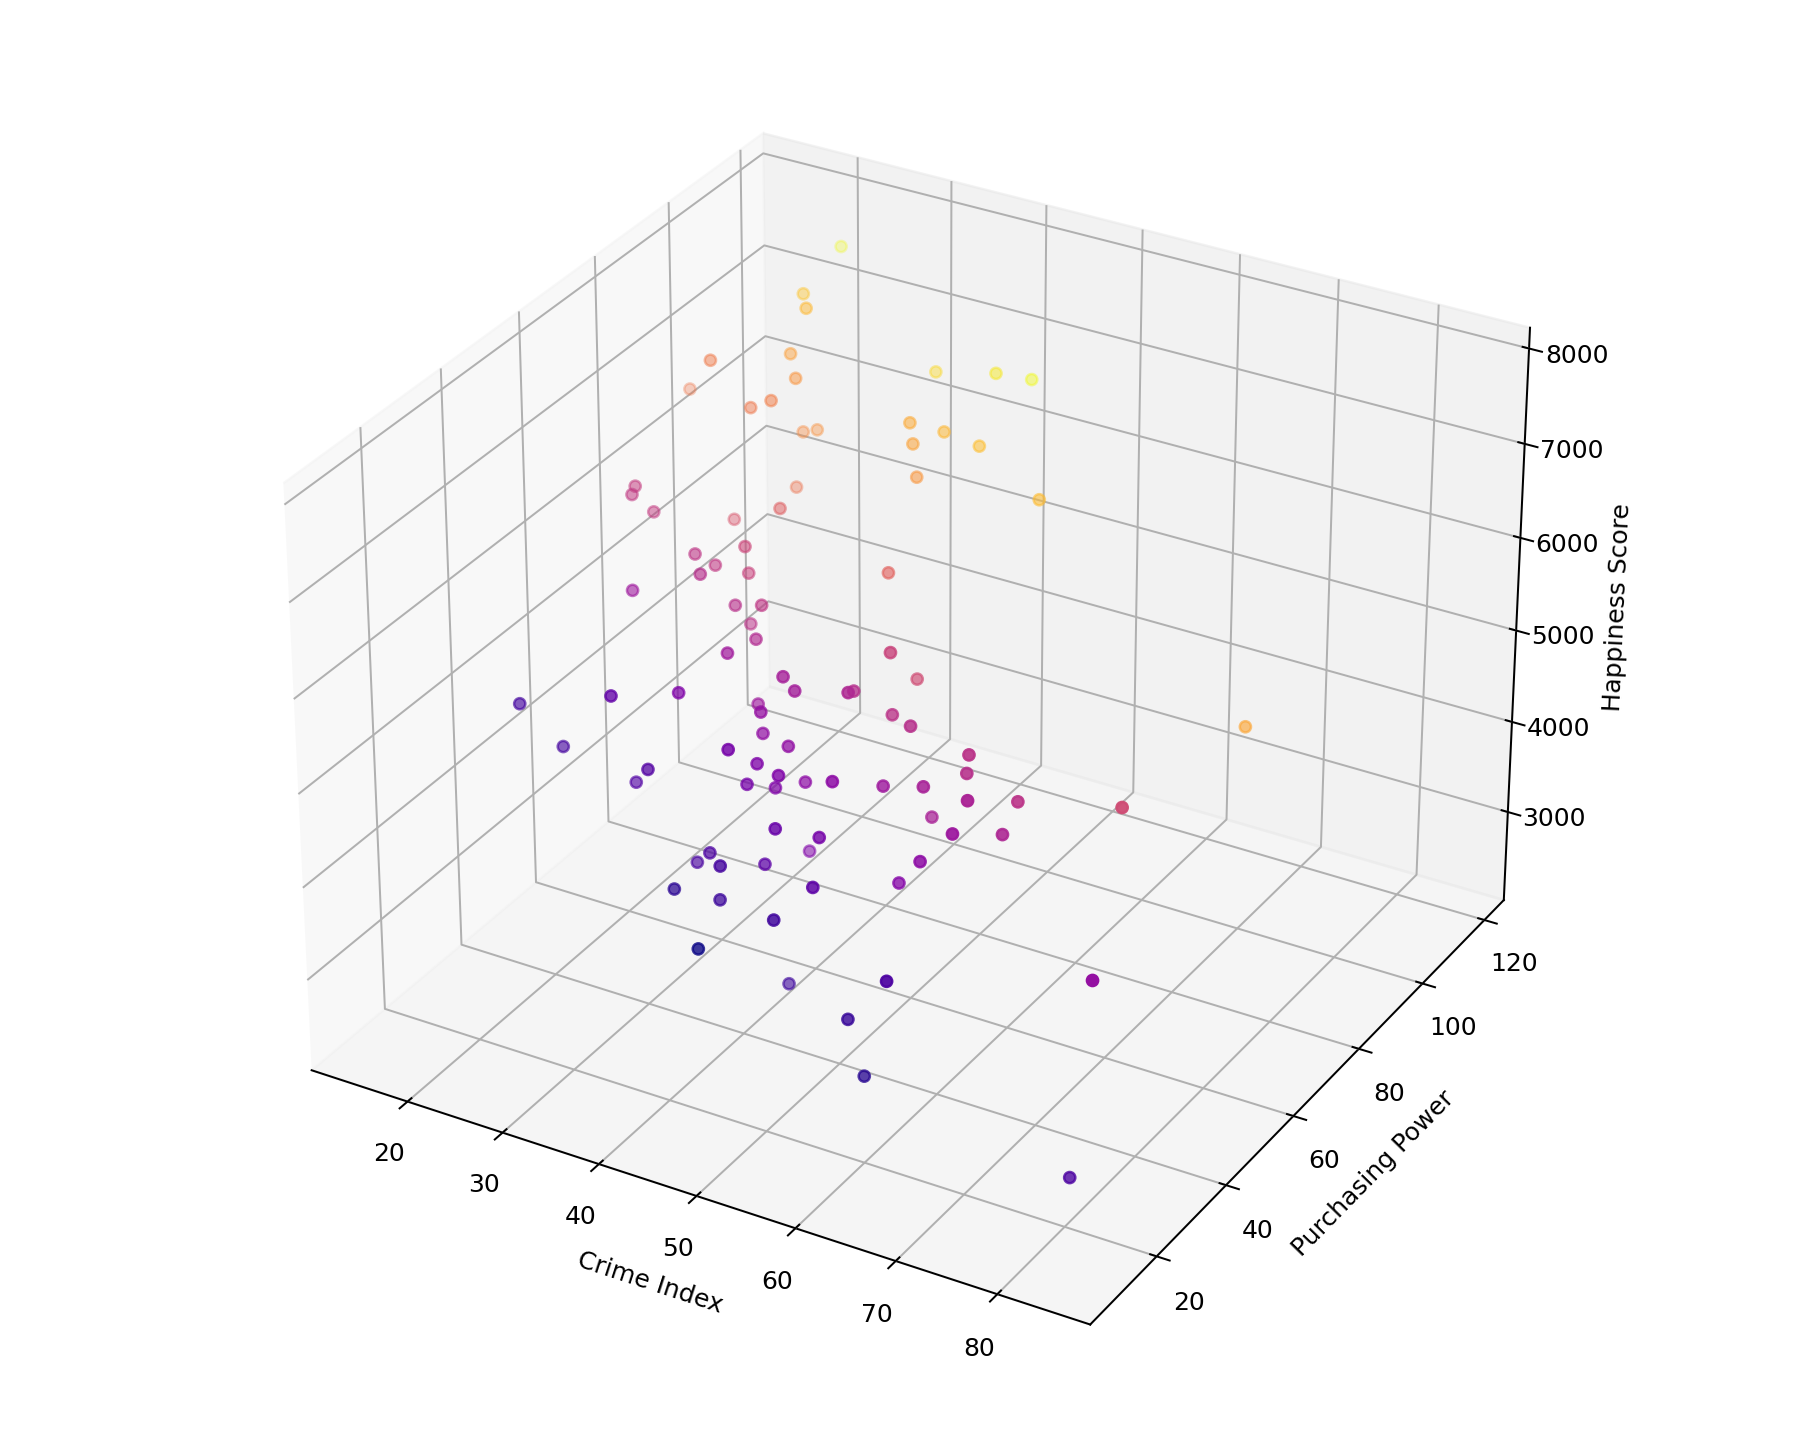

83.98
0    1.000000
1    0.976346
2    0.966245
3    0.960491
4    0.948088
Name: Happiness Score, dtype: float64
0    1.083829
1    1.184211
2    0.917599
3    1.410336
4    1.047749
Name: Local Purchasing Power Index, dtype: float64
0    0.234408
1    0.204914
2    0.194360
3    0.178628
4    0.229948
Name: Crime Index, dtype: float64
94
0    0.772746
1    0.788490
2    0.692735
3    0.849818
4    0.741929
dtype: float64


<IPython.core.display.Javascript object>


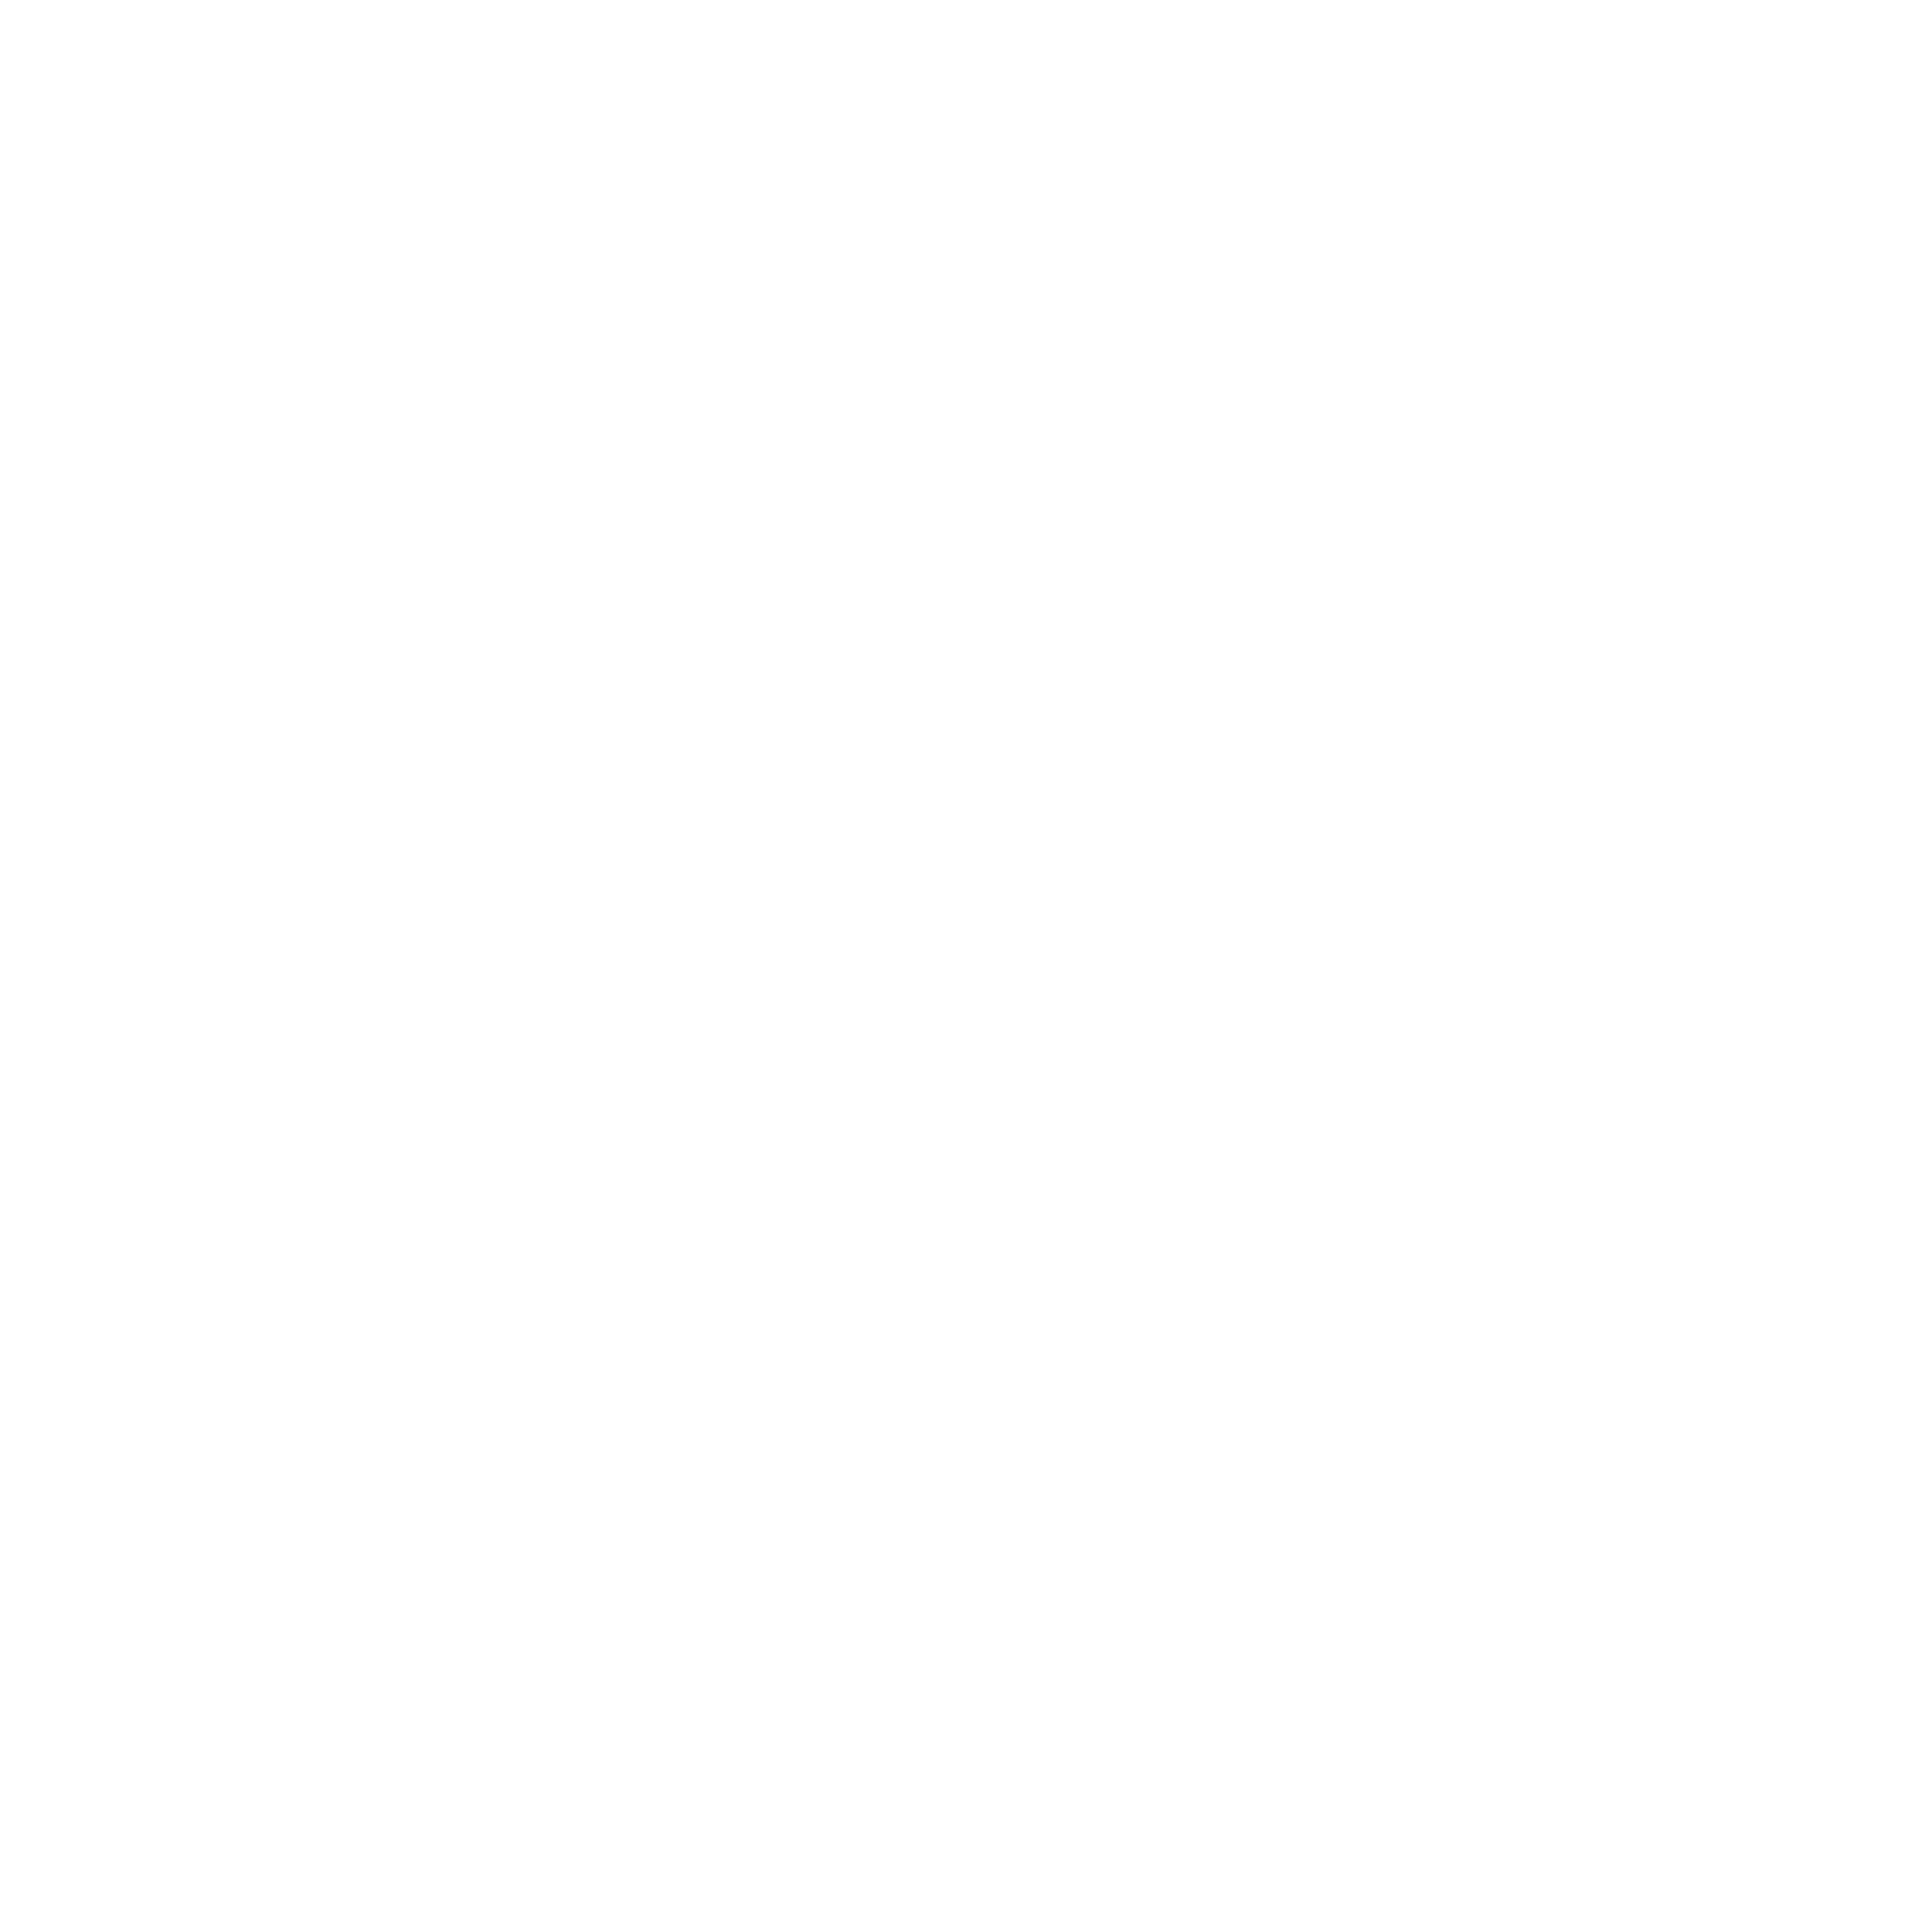

In [58]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8), tight_layout=True)
ax = fig.add_subplot(projection='3d')
x = mHapCosCrim['Crime Index']
xlabel = 'Crime Index'
y = mHapCosCrim['Local Purchasing Power Index']
ylabel = 'Purchasing Power'
z = mHapCosCrim['Happiness Score']
zlabel = 'Happiness Score'
colors = np.random.rand(367)
bin = [3000, 3500, 4000, 4500, 5000 ]
topHap = mHapCosCrim['Happiness Score'].sort_values(ascending=False).head(1).values[0]
topPurch = mHapCosCrim['Local Purchasing Power Index'].sort_values(ascending=False).head(1).values[0]
topCrime = mHapCosCrim['Crime Index'].sort_values(ascending=False).head(1).values[0]
print(topCrime)
red = mHapCosCrim['Happiness Score']/topHap
green = mHapCosCrim['Local Purchasing Power Index']/topCrime
blue = mHapCosCrim['Crime Index']/topPurch 
print(red.head())
print(green.head())
print(blue.head())
triple = (red+ green+blue)/3
print(len(triple))
print(triple.head())

ax.scatter(x, y, z, cmap='plasma', c=triple)# xlabel=xlabel, ylabel=ylabel)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
plt.figure(figsize=(20, 20))
plt.subplots_adjust(right=0.5, bottom=0.5)
plt.show()

In [72]:
bottomHap = mHapCosCrim['Happiness Score'].sort_values().head(1).values[0]
bottomPurch = mHapCosCrim['Local Purchasing Power Index'].sort_values().head(1).values[0]
bottompSafety = mHapCosCrim['Safety Index'].sort_values().head(1).values[0]


topHap = mHapCosCrim['Happiness Score'].sort_values(ascending=False).head(1).values[0]
topPurch = mHapCosCrim['Local Purchasing Power Index'].sort_values(ascending=False).head(1).values[0]
topSafety = mHapCosCrim['Safety Index'].sort_values(ascending=False).head(1).values[0]

mHapCosCrim['Standardized Happiness'] = (mHapCosCrim['Happiness Score'] - bottomHap) / (topHap - bottomHap)
mHapCosCrim['Standardized Local Purchasing Power'] = (mHapCosCrim['Local Purchasing Power Index'] - bottomPurch) / (topPurch - bottomPurch)
mHapCosCrim['Standardized Safety'] = (mHapCosCrim['Safety Index'] - bottompSafety) / (topSafety - bottomPurch)
mHapCosCrim.head()


,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Crime Index,Safety Index,Happiness Standardized,Local Purchasing Power Standardized,Safety Index Standardized,Safety Standardized,Standardized Happiness,Standardized Local Purchasing Power,Standardized Safety
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,27.763333,72.236667,1.000000,0.748671,0.741302,0.741302,1.000000,0.748671,0.741302
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,24.270000,75.730000,0.965848,0.825940,0.787367,0.787367,0.965848,0.825940,0.787367
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,23.020000,76.980000,0.951265,0.620715,0.803850,0.803850,0.951265,0.620715,0.803850
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,21.156667,78.843333,0.942957,1.000000,0.828421,0.828421,0.942957,1.000000,0.828421
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,27.235000,72.765000,0.925051,0.720898,0.748269,0.748269,0.925051,0.720898,0.748269


<IPython.core.display.Javascript object>


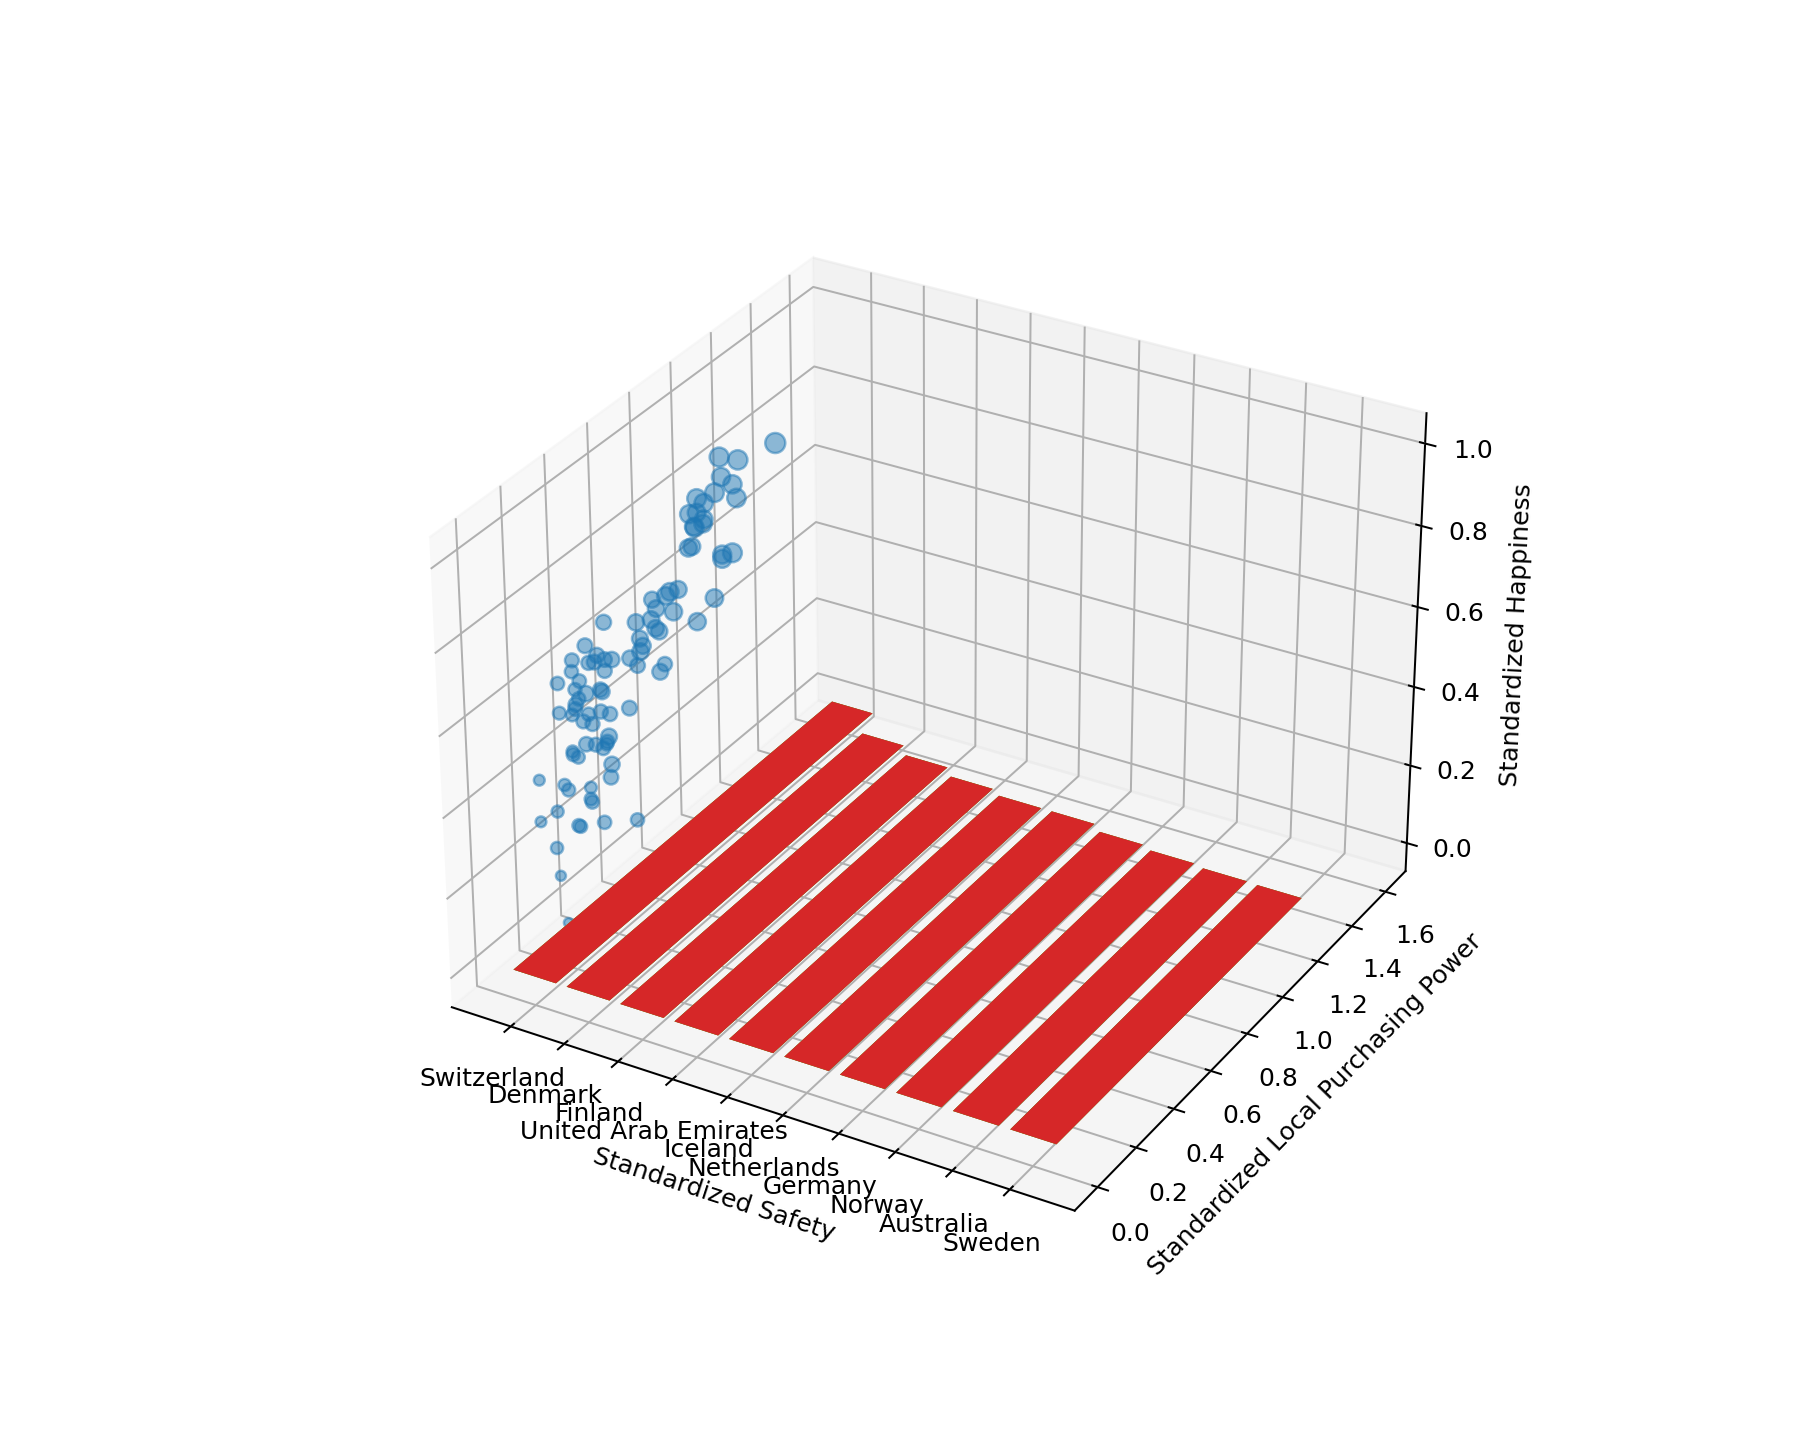

Text(0.5, 0, 'Standardized Happiness')

In [87]:
%matplotlib notebook
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
mHapCosCrim['Equally Weighted Safety, Purchasing, and Happiness'] = np.sqrt(mHapCosCrim['Standardized Safety']**2 + 
                            mHapCosCrim['Standardized Local Purchasing Power']**2 + 
                            mHapCosCrim['Standardized Happiness']**2)
fg = ax.scatter3D(mHapCosCrim['Standardized Safety'], 
                  mHapCosCrim['Standardized Local Purchasing Power'],
                  mHapCosCrim['Standardized Happiness'], 
                  s = 40 * mHapCosCrim['Equally Weighted Safety, Purchasing, and Happiness'],
                  alpha = 0.5,
#                   c = 
                  
                  )
ax.set_xlabel('Standardized Safety')
ax.set_ylabel('Standardized Local Purchasing Power')
ax.set_zlabel('Standardized Happiness')

In [88]:
mHapCosCrim.head()

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Crime Index,Safety Index,Happiness Standardized,Local Purchasing Power Standardized,Safety Index Standardized,Safety Standardized,Standardized Happiness,Standardized Local Purchasing Power,Standardized Safety,"Equally Weighted Safety, Purchasing Power, and Happiness","Equally Weighted Safety, Purchasing, and Happiness"
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,27.763333,72.236667,1.000000,0.748671,0.741302,0.741302,1.000000,0.748671,0.741302,1.452597,1.452597
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,24.270000,75.730000,0.965848,0.825940,0.787367,0.787367,0.965848,0.825940,0.787367,1.494987,1.494987
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,23.020000,76.980000,0.951265,0.620715,0.803850,0.803850,0.951265,0.620715,0.803850,1.391534,1.391534
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,21.156667,78.843333,0.942957,1.000000,0.828421,0.828421,0.942957,1.000000,0.828421,1.604821,1.604821
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,27.235000,72.765000,0.925051,0.720898,0.748269,0.748269,0.925051,0.720898,0.748269,1.391158,1.391158


In [91]:
top10EquallyWeighted = mHapCosCrim.sort_values('Equally Weighted Safety, Purchasing, and Happiness', ascending=False).head(10)

<IPython.core.display.Javascript object>


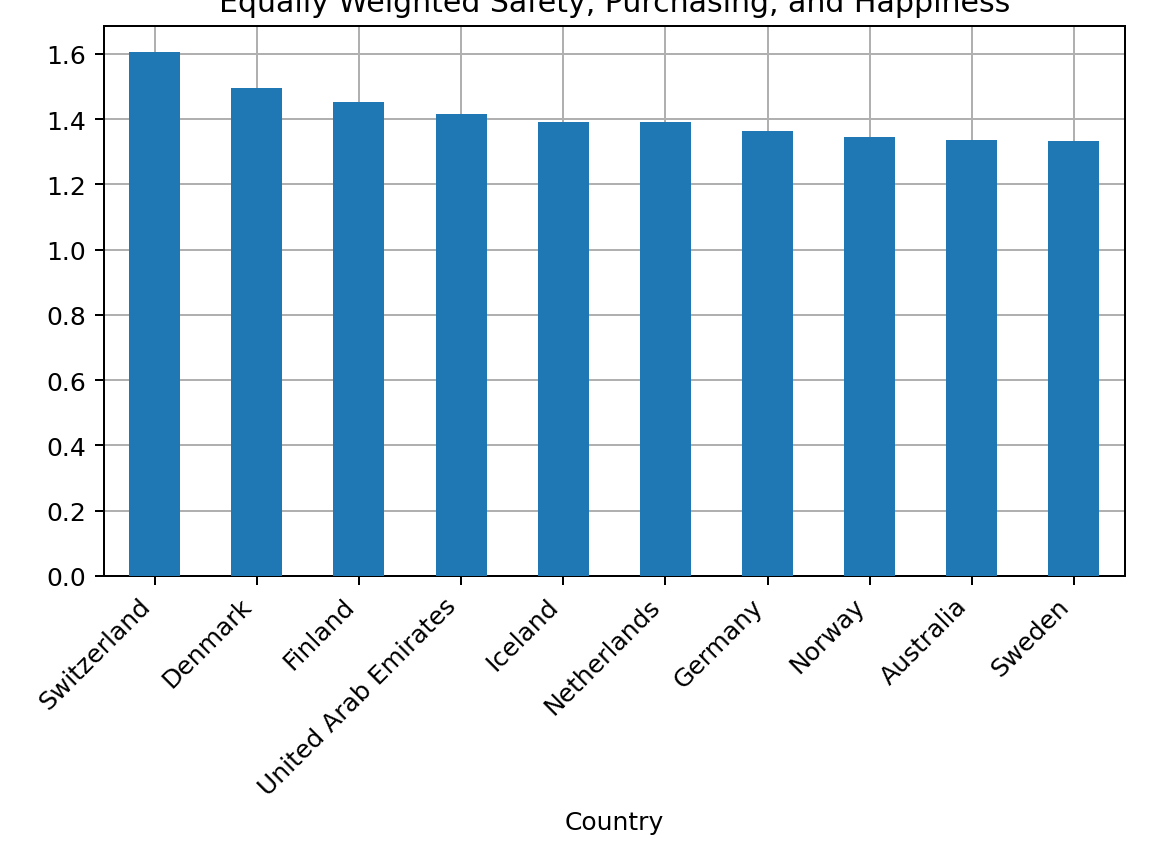

In [110]:
%matplotlib notebook
top10EquallyWeighted.plot(kind='bar', x = 'Country', 
                          y = 'Equally Weighted Safety, Purchasing, and Happiness', zorder=5,
                         legend=None)
# plt.bar(top10EquallyWeighted['Country'], 
#         top10EquallyWeighted['Equally Weighted Safety, Purchasing, and Happiness'])
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.title('Equally Weighted Safety, Purchasing, and Happiness')

plt.grid(zorder=0)
plt.show()